## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9785964	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9580867	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9387958	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9219558	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9070778	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8900421	total: 63.9ms	remaining: 10.6s
6:	learn: 0.8728321	total: 64.8ms	remaining: 9.2s
7:	learn: 0.8553517	total: 65.9ms	remaining: 8.16s
8:	learn: 0.8398497	total: 66.8ms	remaining: 7.36s
9:	learn: 0.8244386	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8115741	total: 68.5ms	remaining: 6.16s
11:	learn: 0.7974220	total: 69.3ms	remaining: 5.7s
12:	learn: 0.7823928	total: 70.1ms	remaining: 5.32s
13:	learn: 0.7679237	total: 70.9ms	remaining: 5s
14:	learn: 0.7545847	total: 71.8ms	remaining: 4.71s
15:	learn: 0.7404446	total: 72.6ms	remaining: 4.47s
16:	learn: 0.7295023	total: 73.6ms	remaining: 4.25s
17:	learn: 0.7164294	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7042214	total: 75.2ms	remaining: 3.88

59:	learn: 0.4147526	total: 109ms	remaining: 1.71s
60:	learn: 0.4113810	total: 110ms	remaining: 1.69s
61:	learn: 0.4067250	total: 111ms	remaining: 1.67s
62:	learn: 0.4026839	total: 111ms	remaining: 1.66s
63:	learn: 0.3981923	total: 112ms	remaining: 1.64s
64:	learn: 0.3948832	total: 113ms	remaining: 1.62s
65:	learn: 0.3912344	total: 114ms	remaining: 1.61s
66:	learn: 0.3871272	total: 114ms	remaining: 1.59s
67:	learn: 0.3843306	total: 115ms	remaining: 1.58s
68:	learn: 0.3810692	total: 116ms	remaining: 1.56s
69:	learn: 0.3771011	total: 117ms	remaining: 1.55s
70:	learn: 0.3734541	total: 118ms	remaining: 1.54s
71:	learn: 0.3700047	total: 118ms	remaining: 1.53s
72:	learn: 0.3675670	total: 119ms	remaining: 1.51s
73:	learn: 0.3650255	total: 120ms	remaining: 1.5s
74:	learn: 0.3613717	total: 121ms	remaining: 1.49s
75:	learn: 0.3581442	total: 122ms	remaining: 1.48s
76:	learn: 0.3552798	total: 122ms	remaining: 1.47s
77:	learn: 0.3524159	total: 123ms	remaining: 1.46s
78:	learn: 0.3491009	total: 124m

160:	learn: 0.2403781	total: 192ms	remaining: 999ms
161:	learn: 0.2397089	total: 193ms	remaining: 996ms
162:	learn: 0.2391468	total: 193ms	remaining: 993ms
163:	learn: 0.2387597	total: 194ms	remaining: 990ms
164:	learn: 0.2381401	total: 195ms	remaining: 987ms
165:	learn: 0.2374794	total: 196ms	remaining: 984ms
166:	learn: 0.2368900	total: 197ms	remaining: 981ms
167:	learn: 0.2359622	total: 198ms	remaining: 978ms
168:	learn: 0.2353900	total: 198ms	remaining: 976ms
169:	learn: 0.2348051	total: 199ms	remaining: 973ms
170:	learn: 0.2342381	total: 200ms	remaining: 970ms
171:	learn: 0.2336896	total: 201ms	remaining: 967ms
172:	learn: 0.2329693	total: 202ms	remaining: 964ms
173:	learn: 0.2321716	total: 202ms	remaining: 961ms
174:	learn: 0.2316375	total: 203ms	remaining: 958ms
175:	learn: 0.2311646	total: 204ms	remaining: 954ms
176:	learn: 0.2303517	total: 205ms	remaining: 951ms
177:	learn: 0.2296798	total: 205ms	remaining: 949ms
178:	learn: 0.2289990	total: 206ms	remaining: 946ms
179:	learn: 

291:	learn: 0.1759502	total: 299ms	remaining: 726ms
292:	learn: 0.1755306	total: 300ms	remaining: 725ms
293:	learn: 0.1753958	total: 301ms	remaining: 724ms
294:	learn: 0.1750708	total: 302ms	remaining: 723ms
295:	learn: 0.1749237	total: 303ms	remaining: 721ms
296:	learn: 0.1746240	total: 304ms	remaining: 719ms
297:	learn: 0.1745034	total: 305ms	remaining: 718ms
298:	learn: 0.1743659	total: 306ms	remaining: 717ms
299:	learn: 0.1738731	total: 306ms	remaining: 715ms
300:	learn: 0.1735748	total: 307ms	remaining: 714ms
301:	learn: 0.1730490	total: 308ms	remaining: 712ms
302:	learn: 0.1728540	total: 309ms	remaining: 711ms
303:	learn: 0.1727174	total: 310ms	remaining: 709ms
304:	learn: 0.1720946	total: 311ms	remaining: 708ms
305:	learn: 0.1717281	total: 312ms	remaining: 707ms
306:	learn: 0.1712820	total: 312ms	remaining: 705ms
307:	learn: 0.1711237	total: 313ms	remaining: 704ms
308:	learn: 0.1705676	total: 314ms	remaining: 702ms
309:	learn: 0.1704387	total: 315ms	remaining: 701ms
310:	learn: 

391:	learn: 0.1455106	total: 382ms	remaining: 593ms
392:	learn: 0.1454258	total: 383ms	remaining: 592ms
393:	learn: 0.1453164	total: 384ms	remaining: 590ms
394:	learn: 0.1450706	total: 385ms	remaining: 589ms
395:	learn: 0.1447539	total: 386ms	remaining: 588ms
396:	learn: 0.1447158	total: 386ms	remaining: 587ms
397:	learn: 0.1443784	total: 387ms	remaining: 586ms
398:	learn: 0.1441462	total: 388ms	remaining: 585ms
399:	learn: 0.1438642	total: 389ms	remaining: 583ms
400:	learn: 0.1435244	total: 390ms	remaining: 582ms
401:	learn: 0.1432892	total: 391ms	remaining: 581ms
402:	learn: 0.1430232	total: 392ms	remaining: 580ms
403:	learn: 0.1428402	total: 392ms	remaining: 579ms
404:	learn: 0.1425859	total: 393ms	remaining: 577ms
405:	learn: 0.1421911	total: 394ms	remaining: 576ms
406:	learn: 0.1418019	total: 395ms	remaining: 575ms
407:	learn: 0.1415396	total: 395ms	remaining: 574ms
408:	learn: 0.1412875	total: 396ms	remaining: 573ms
409:	learn: 0.1411488	total: 397ms	remaining: 571ms
410:	learn: 

520:	learn: 0.1147454	total: 490ms	remaining: 450ms
521:	learn: 0.1144964	total: 491ms	remaining: 449ms
522:	learn: 0.1142990	total: 492ms	remaining: 448ms
523:	learn: 0.1140763	total: 492ms	remaining: 447ms
524:	learn: 0.1138067	total: 493ms	remaining: 446ms
525:	learn: 0.1135934	total: 494ms	remaining: 445ms
526:	learn: 0.1135440	total: 495ms	remaining: 444ms
527:	learn: 0.1133265	total: 496ms	remaining: 443ms
528:	learn: 0.1132627	total: 496ms	remaining: 442ms
529:	learn: 0.1129751	total: 497ms	remaining: 441ms
530:	learn: 0.1127291	total: 498ms	remaining: 440ms
531:	learn: 0.1125574	total: 499ms	remaining: 439ms
532:	learn: 0.1123194	total: 500ms	remaining: 438ms
533:	learn: 0.1120617	total: 501ms	remaining: 437ms
534:	learn: 0.1119057	total: 501ms	remaining: 436ms
535:	learn: 0.1115672	total: 502ms	remaining: 435ms
536:	learn: 0.1113431	total: 503ms	remaining: 434ms
537:	learn: 0.1111452	total: 504ms	remaining: 433ms
538:	learn: 0.1108586	total: 505ms	remaining: 432ms
539:	learn: 

622:	learn: 0.0960309	total: 573ms	remaining: 347ms
623:	learn: 0.0958610	total: 574ms	remaining: 346ms
624:	learn: 0.0956472	total: 574ms	remaining: 345ms
625:	learn: 0.0954793	total: 575ms	remaining: 344ms
626:	learn: 0.0953349	total: 576ms	remaining: 343ms
627:	learn: 0.0952808	total: 577ms	remaining: 342ms
628:	learn: 0.0950449	total: 578ms	remaining: 341ms
629:	learn: 0.0948814	total: 579ms	remaining: 340ms
630:	learn: 0.0948603	total: 579ms	remaining: 339ms
631:	learn: 0.0947168	total: 580ms	remaining: 338ms
632:	learn: 0.0945139	total: 581ms	remaining: 337ms
633:	learn: 0.0943949	total: 582ms	remaining: 336ms
634:	learn: 0.0941689	total: 583ms	remaining: 335ms
635:	learn: 0.0940155	total: 584ms	remaining: 334ms
636:	learn: 0.0938351	total: 584ms	remaining: 333ms
637:	learn: 0.0936401	total: 585ms	remaining: 332ms
638:	learn: 0.0935297	total: 586ms	remaining: 331ms
639:	learn: 0.0934908	total: 587ms	remaining: 330ms
640:	learn: 0.0932421	total: 588ms	remaining: 329ms
641:	learn: 

752:	learn: 0.0783683	total: 679ms	remaining: 223ms
753:	learn: 0.0782275	total: 680ms	remaining: 222ms
754:	learn: 0.0781416	total: 681ms	remaining: 221ms
755:	learn: 0.0779903	total: 682ms	remaining: 220ms
756:	learn: 0.0778114	total: 683ms	remaining: 219ms
757:	learn: 0.0777228	total: 684ms	remaining: 218ms
758:	learn: 0.0776090	total: 685ms	remaining: 217ms
759:	learn: 0.0775645	total: 686ms	remaining: 216ms
760:	learn: 0.0774086	total: 686ms	remaining: 216ms
761:	learn: 0.0772799	total: 687ms	remaining: 215ms
762:	learn: 0.0771133	total: 688ms	remaining: 214ms
763:	learn: 0.0769829	total: 689ms	remaining: 213ms
764:	learn: 0.0768083	total: 690ms	remaining: 212ms
765:	learn: 0.0766970	total: 690ms	remaining: 211ms
766:	learn: 0.0766114	total: 691ms	remaining: 210ms
767:	learn: 0.0765617	total: 692ms	remaining: 209ms
768:	learn: 0.0765155	total: 693ms	remaining: 208ms
769:	learn: 0.0764247	total: 694ms	remaining: 207ms
770:	learn: 0.0763041	total: 694ms	remaining: 206ms
771:	learn: 

852:	learn: 0.0682230	total: 763ms	remaining: 131ms
853:	learn: 0.0682068	total: 764ms	remaining: 131ms
854:	learn: 0.0680711	total: 765ms	remaining: 130ms
855:	learn: 0.0679742	total: 766ms	remaining: 129ms
856:	learn: 0.0678189	total: 767ms	remaining: 128ms
857:	learn: 0.0676524	total: 768ms	remaining: 127ms
858:	learn: 0.0675056	total: 768ms	remaining: 126ms
859:	learn: 0.0673026	total: 769ms	remaining: 125ms
860:	learn: 0.0672535	total: 770ms	remaining: 124ms
861:	learn: 0.0671710	total: 771ms	remaining: 123ms
862:	learn: 0.0671392	total: 772ms	remaining: 123ms
863:	learn: 0.0670475	total: 773ms	remaining: 122ms
864:	learn: 0.0669368	total: 774ms	remaining: 121ms
865:	learn: 0.0668422	total: 775ms	remaining: 120ms
866:	learn: 0.0668142	total: 776ms	remaining: 119ms
867:	learn: 0.0666305	total: 777ms	remaining: 118ms
868:	learn: 0.0664962	total: 778ms	remaining: 117ms
869:	learn: 0.0663614	total: 779ms	remaining: 116ms
870:	learn: 0.0662621	total: 780ms	remaining: 116ms
871:	learn: 

978:	learn: 0.0572442	total: 869ms	remaining: 18.6ms
979:	learn: 0.0571764	total: 870ms	remaining: 17.8ms
980:	learn: 0.0571461	total: 871ms	remaining: 16.9ms
981:	learn: 0.0570144	total: 872ms	remaining: 16ms
982:	learn: 0.0569179	total: 873ms	remaining: 15.1ms
983:	learn: 0.0567863	total: 874ms	remaining: 14.2ms
984:	learn: 0.0567251	total: 874ms	remaining: 13.3ms
985:	learn: 0.0566514	total: 875ms	remaining: 12.4ms
986:	learn: 0.0565569	total: 876ms	remaining: 11.5ms
987:	learn: 0.0565119	total: 877ms	remaining: 10.7ms
988:	learn: 0.0564352	total: 878ms	remaining: 9.76ms
989:	learn: 0.0563643	total: 879ms	remaining: 8.88ms
990:	learn: 0.0563443	total: 880ms	remaining: 7.99ms
991:	learn: 0.0563283	total: 880ms	remaining: 7.1ms
992:	learn: 0.0562441	total: 881ms	remaining: 6.21ms
993:	learn: 0.0561090	total: 882ms	remaining: 5.32ms
994:	learn: 0.0560153	total: 883ms	remaining: 4.43ms
995:	learn: 0.0560009	total: 883ms	remaining: 3.55ms
996:	learn: 0.0558507	total: 884ms	remaining: 2.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

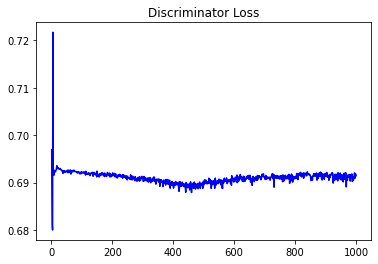

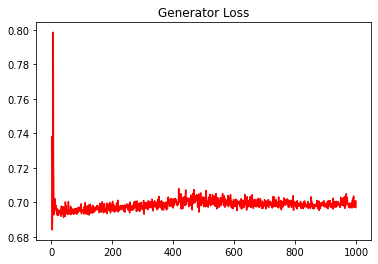

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1174870446028278


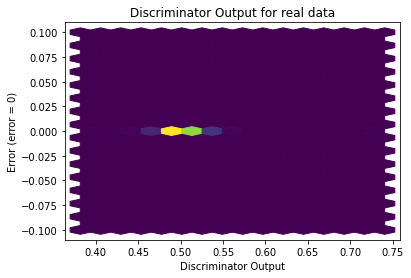

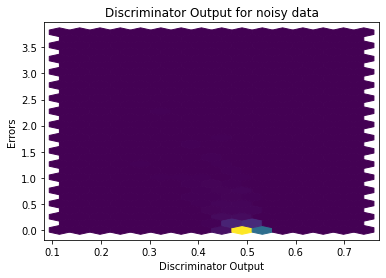

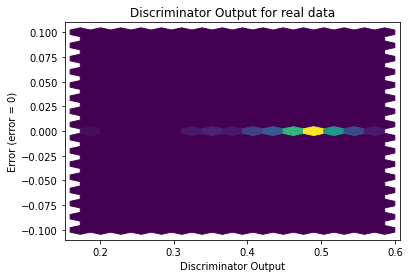

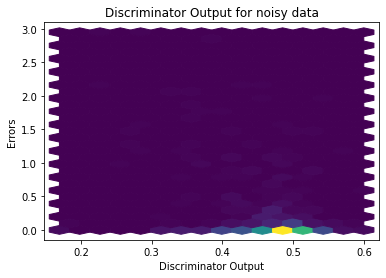

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


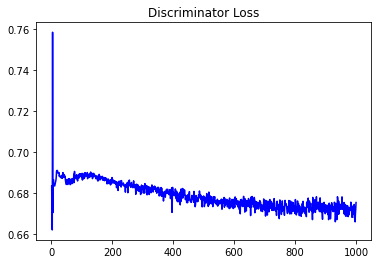

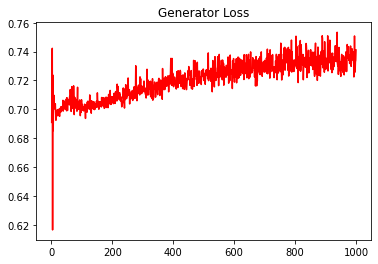

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11235110903030054


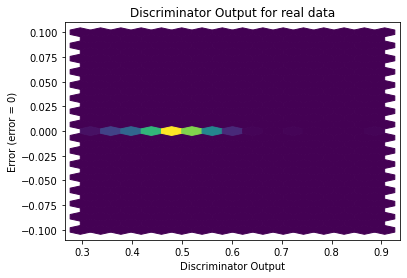

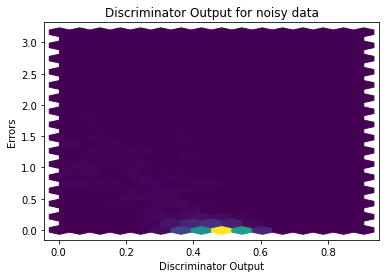

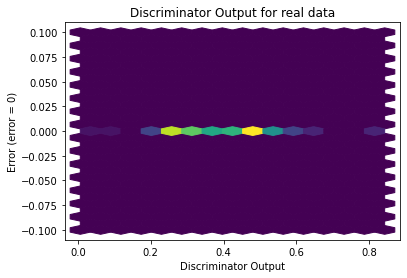

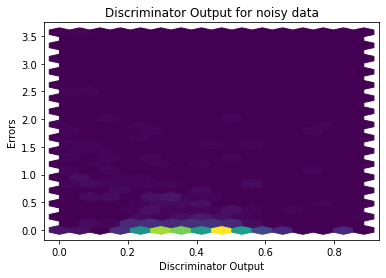

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2460]], requires_grad=True)
